In [1390]:
# Importing required libraries
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1391]:
df=pd.read_csv('D:\Data-recovery-18-04-2023\Leeds\Sem 2\MLP\CW\LUBS5990M_courseworkData_202223.csv')
df.head()

,ID,success,brandSlogan,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,1,N,Is One of Its Kind ERC-20 Decentralized Stable...,1,4.0,30.00,Singapore,01/10/2019,01/10/2019,31.0,1,1,Ethereum,509999,0,0.49
1,2,N,The Ultimate Blockchain Gaming Platform,1,4.3,0.13,Malta,07/09/2018,12/10/2018,20.0,1,1,XAYA,225000000,1,0.41
2,3,N,Simple Automated Investment App Driven by AI & ML,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,Stellar,5000000000,1,0.40
3,4,Y,International Real Estate Crowdfunding Platform,1,4.3,NaN,Netherlands,01/10/2019,15/12/2019,27.0,1,1,Separate blockchain,125000000,1,0.13
4,5,N,"Secure, Interference-Free Communications System",1,4.3,0.03,Mauritius,28/07/2019,30/11/2019,14.0,1,1,Ethereum,5000000000,1,0.50


In [1392]:
df.shape

(2767, 16)

In [1393]:
df.dtypes

ID                         int64
success                   object
brandSlogan               object
hasVideo                   int64
rating                   float64
priceUSD                 float64
countryRegion             object
startDate                 object
endDate                   object
teamSize                 float64
hasGithub                  int64
hasReddit                  int64
platform                  object
coinNum                    int64
minInvestment              int64
distributedPercentage    float64
dtype: object

In [1394]:
df.describe

<bound method NDFrame.describe of         ID success                                        brandSlogan  \
0        1       N  Is One of Its Kind ERC-20 Decentralized Stable...   
1        2       N            The Ultimate Blockchain Gaming Platform   
2        3       N  Simple Automated Investment App Driven by AI & ML   
3        4       Y    International Real Estate Crowdfunding Platform   
4        5       N    Secure, Interference-Free Communications System   
...    ...     ...                                                ...   
2762  2763       N             Helping the adoption of cryptocurrency   
2763  2764       N                          The Adult Industry Crypto   
2764  2765       Y              Fast, cheap, scalable token transfers   
2765  2766       N                         CarVDB Blockchain Platform   
2766  2767       N                       A True Token of Appreciation   

      hasVideo  rating  priceUSD countryRegion   startDate     endDate  \
0            1 

In [1395]:
df.isnull().sum()

ID                         0
success                    0
brandSlogan                0
hasVideo                   0
rating                     0
priceUSD                 180
countryRegion             71
startDate                  0
endDate                    0
teamSize                 154
hasGithub                  0
hasReddit                  0
platform                   0
coinNum                    0
minInvestment              0
distributedPercentage      0
dtype: int64

In [1396]:
#df.dropna(inplace=True)

In [1397]:
# Change the datatype of 'teamSize' column to integer
#df['teamSize'] = df['teamSize'].astype(int)
#df['success'] = df['success'].astype(bool)

In [1398]:
# Preprocess 'countryregion' column
df['countryRegion'] = df['countryRegion'].str.strip()  # Remove leading/trailing white spaces
df['countryRegion'] = df['countryRegion'].str.upper()  # Convert to uppercase

count_values = df['countryRegion'].value_counts()
count_values

SINGAPORE             313
USA                   297
UK                    285
ESTONIA               191
SWITZERLAND           140
                     ... 
ECUADOR                 1
DOMINICAN REPUBLIC      1
SYRIA                   1
NEW CALEDONIA           1
HONDURAS                1
Name: countryRegion, Length: 117, dtype: int64

In [1399]:
# Preprocess 'platform' column
df['platform'] = df['platform'].str.strip()  # Remove leading/trailing white spaces
df['platform'] = df['platform'].str.upper()  # Convert to uppercase

count_values = df['platform'].value_counts()
count_values

ETHEREUM               2405
WAVES                    57
STELLAR                  41
SEPARATE BLOCKCHAIN      39
NEO                      22
                       ... 
LISK                      1
WIZEBIT                   1
ARDOR                     1
BLOCKCHAIN                1
VASYA                     1
Name: platform, Length: 106, dtype: int64

In [1400]:
#df.shape

In [1401]:
# Drop any irrelevant columns
df = df.drop(["ID","brandSlogan"], axis=1)
df.head()

,success,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,N,1,4.0,30.00,SINGAPORE,01/10/2019,01/10/2019,31.0,1,1,ETHEREUM,509999,0,0.49
1,N,1,4.3,0.13,MALTA,07/09/2018,12/10/2018,20.0,1,1,XAYA,225000000,1,0.41
2,N,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,STELLAR,5000000000,1,0.40
3,Y,1,4.3,NaN,NETHERLANDS,01/10/2019,15/12/2019,27.0,1,1,SEPARATE BLOCKCHAIN,125000000,1,0.13
4,N,1,4.3,0.03,MAURITIUS,28/07/2019,30/11/2019,14.0,1,1,ETHEREUM,5000000000,1,0.50


In [1402]:
# Apply logarithmic transformation to 'coinNum' column
df['coinNum'] = np.log10(df['coinNum'])
df

,success,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage
0,N,1,4.0,30.00,SINGAPORE,01/10/2019,01/10/2019,31.0,1,1,ETHEREUM,5.707569,0,0.49
1,N,1,4.3,0.13,MALTA,07/09/2018,12/10/2018,20.0,1,1,XAYA,8.352183,1,0.41
2,N,1,4.4,0.01,UK,01/07/2019,30/06/2020,10.0,1,1,STELLAR,9.698970,1,0.40
3,Y,1,4.3,NaN,NETHERLANDS,01/10/2019,15/12/2019,27.0,1,1,SEPARATE BLOCKCHAIN,8.096910,1,0.13
4,N,1,4.3,0.03,MAURITIUS,28/07/2019,30/11/2019,14.0,1,1,ETHEREUM,9.698970,1,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,N,0,1.0,1.00,USA,02/12/2017,31/12/2017,NaN,0,0,ETHEREUM,8.903090,0,0.80
2763,N,0,1.0,0.30,INDONESIA,15/09/2017,31/10/2017,NaN,0,0,ETHEREUM,8.000000,0,0.20
2764,Y,1,2.0,0.67,GERMANY,18/10/2017,01/11/2017,NaN,1,1,ETHEREUM,7.698970,0,0.50
2765,N,0,1.8,0.33,BULGARIA,01/04/2018,11/06/2018,NaN,0,0,ETHEREUM,7.698784,1,0.50


In [1403]:
# Convert start date and end date to datetime format
df['startDate'] = pd.to_datetime(df['startDate'], format='%d/%m/%Y')
df['endDate'] = pd.to_datetime(df['endDate'], format='%d/%m/%Y')

# Calculate duration in days
df['Duration(days)'] = (df['endDate'] - df['startDate']).dt.days
df.tail()

,success,hasVideo,rating,priceUSD,countryRegion,startDate,endDate,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,Duration(days)
2762,N,0,1.0,1.00,USA,2017-12-02,2017-12-31,NaN,0,0,ETHEREUM,8.903090,0,0.8,29
2763,N,0,1.0,0.30,INDONESIA,2017-09-15,2017-10-31,NaN,0,0,ETHEREUM,8.000000,0,0.2,46
2764,Y,1,2.0,0.67,GERMANY,2017-10-18,2017-11-01,NaN,1,1,ETHEREUM,7.698970,0,0.5,14
2765,N,0,1.8,0.33,BULGARIA,2018-04-01,2018-06-11,NaN,0,0,ETHEREUM,7.698784,1,0.5,71
2766,N,0,1.1,0.05,USA,2017-07-30,2017-08-30,NaN,0,1,WAVES,8.000000,0,0.5,31


In [1404]:
df=df[df['Duration(days)'] > 0]
df.shape

(2715, 15)

In [1405]:
df = df.drop(["startDate","endDate"], axis=1)
df.head()

,success,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,Duration(days)
1,N,1,4.3,0.13,MALTA,20.0,1,1,XAYA,8.352183,1,0.41,35
2,N,1,4.4,0.01,UK,10.0,1,1,STELLAR,9.698970,1,0.40,365
3,Y,1,4.3,NaN,NETHERLANDS,27.0,1,1,SEPARATE BLOCKCHAIN,8.096910,1,0.13,75
4,N,1,4.3,0.03,MAURITIUS,14.0,1,1,ETHEREUM,9.698970,1,0.50,125
5,N,1,4.7,0.10,UK,43.0,1,1,ETHEREUM,8.698970,1,0.50,126


array([[<AxesSubplot:title={'center':'hasVideo'}>,
        <AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'priceUSD'}>],
       [<AxesSubplot:title={'center':'teamSize'}>,
        <AxesSubplot:title={'center':'hasGithub'}>,
        <AxesSubplot:title={'center':'hasReddit'}>],
       [<AxesSubplot:title={'center':'coinNum'}>,
        <AxesSubplot:title={'center':'minInvestment'}>,
        <AxesSubplot:title={'center':'distributedPercentage'}>],
       [<AxesSubplot:title={'center':'Duration(days)'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

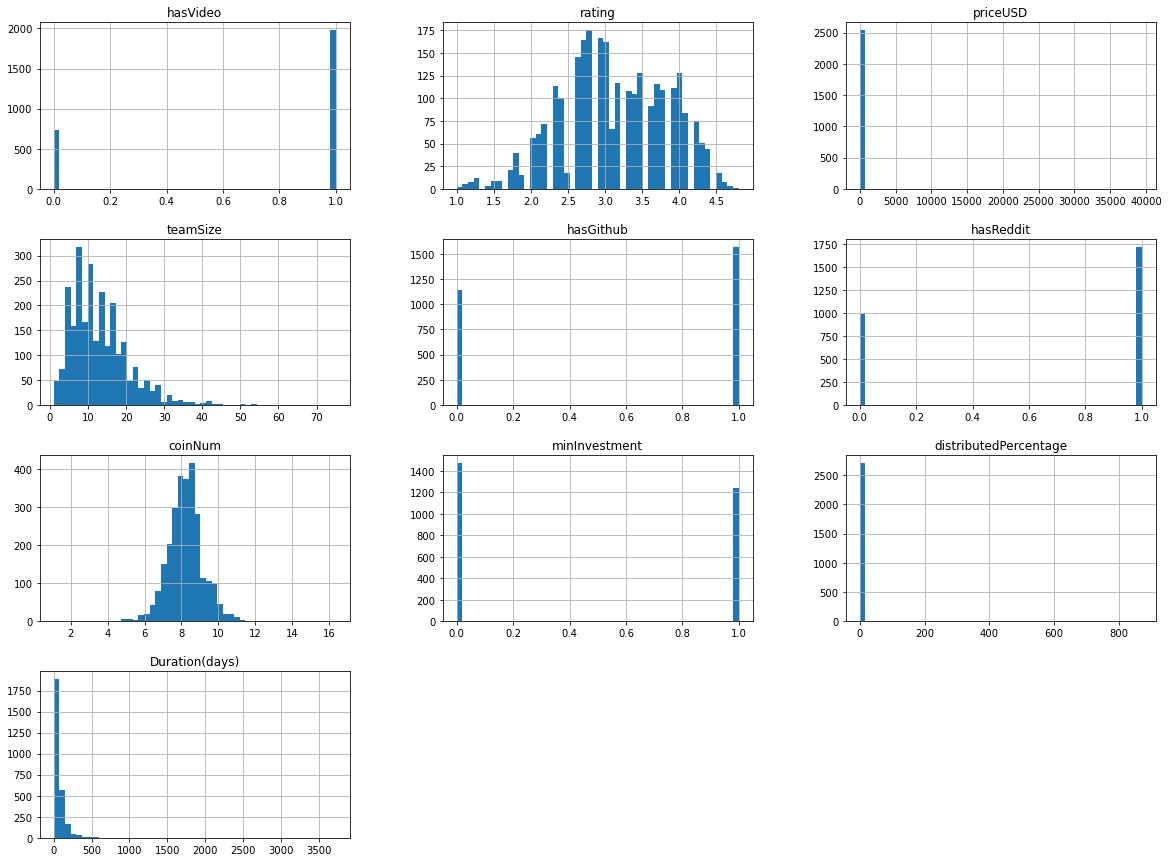

In [1406]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15))

### Interquartile range (IQR) to Detect Outliers 
The detect_outliers_iqr function uses the interquartile range (IQR) method to detect outliers in a specific column of a dataframe. It calculates the first quartile (Q1), third quartile (Q3), and the IQR. Based on these values, it identifies outliers by filtering the dataframe. The function then returns a dataframe containing the detected outliers.

def detect_outliers_iqr(dataframe, column):
    # Calculate the first quartile (Q1)
    Q1 = dataframe[column].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = dataframe[column].quantile(0.75)
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the outliers
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    
    return pd.DataFrame(outliers)

print("Outliers in rating column")
outliers = pd.DataFrame(detect_outliers_iqr(df, 'rating'))
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in teamSize column")
outliers = detect_outliers_iqr(df, 'teamSize')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in Duration(days) column")
outliers = detect_outliers_iqr(df, 'Duration(days)')
print(outliers)
print("-----------------------------------------------------------------")

print("Outliers in coinNum column")
outliers = detect_outliers_iqr(df, 'coinNum')
print(outliers)
print("-----------------------------------------------------------------")

### Handling and dealing with outliers
To handle outliers in the given dataset, we have two options: removing the outliers or replacing them with the median values. Considering the huge amount of data loss by simply removing NA vakues or outliers, it is advisable to replace the outlier values with the median of their respective columns. This approach preserves the data integrity while mitigating the impact of outliers on the analysis.

Here's an improved version of the function that replaces outliers with the median value:

In [1407]:
def replace_outliers_with_median(dataframe, column):
    # Calculate the first quartile (Q1)
    Q1 = dataframe[column].quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = dataframe[column].quantile(0.75)
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace the outliers with the median value
    median_value = dataframe[column].median()
    dataframe.loc[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound), column] = median_value
    
    return dataframe


In this function, we calculate the lower and upper bounds based on the interquartile range (IQR) and replace any values outside these bounds with the median value of the column. The modified DataFrame is returned, and you can use it for further analysis or display.

In [1408]:
df = replace_outliers_with_median(df, 'rating')
df= replace_outliers_with_median(df, 'teamSize')
df = replace_outliers_with_median(df, 'Duration(days)')
df = replace_outliers_with_median(df, 'coinNum')

In [1409]:
#sns.pairplot(df, hue='success')
#plt.show()

In [1410]:
#sns.countplot(x='hasVideo', hue='success', data=df)
#plt.xticks(rotation=90)
#plt.show()

#sns.countplot(x='rating', hue='success', data=df)
#plt.xticks(rotation=90)
#plt.show()

#sns.countplot(x='priceUSD', hue='success', data=df)
#plt.xticks(rotation=90)
#plt.show()

#sns.histplot(x='teamSize', hue='success', data=df)
#plt.show()

#sns.histplot(x='hasGithub', hue='success', data=df)
#plt.show()

#sns.histplot(x='hasReddit', hue='success', data=df)
#plt.show()



In [1411]:
#sns.histplot(x='coinNum', hue='success', data=df)
#plt.show()

#sns.histplot(x='minInvestment', hue='success', data=df)
#plt.show()

#sns.histplot(x='distributedPercentage', hue='success', data=df)
#plt.show()

#sns.histplot(x='Duration(days)', hue='success', data=df)
#plt.show()

In [1412]:
# Create a correlation matrix to show the relationships among the predictors
#corr_matrix = df.corr()
#sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
#plt.show()

In [1413]:
# Map 'YES' to 1 and 'NO' to 0
df['success'] = df['success'].map({'Y': 1, 'N': 0})

# Display the updated dataframe
df

,success,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,Duration(days)
1,0,1,4.3,0.13,MALTA,20.0,1,1,XAYA,8.352183,1,0.41,35
2,0,1,4.4,0.01,UK,10.0,1,1,STELLAR,9.698970,1,0.40,46
3,1,1,4.3,NaN,NETHERLANDS,27.0,1,1,SEPARATE BLOCKCHAIN,8.096910,1,0.13,75
4,0,1,4.3,0.03,MAURITIUS,14.0,1,1,ETHEREUM,9.698970,1,0.50,125
5,0,1,4.7,0.10,UK,11.0,1,1,ETHEREUM,8.698970,1,0.50,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,0,0,1.0,1.00,USA,NaN,0,0,ETHEREUM,8.903090,0,0.80,29
2763,0,0,1.0,0.30,INDONESIA,NaN,0,0,ETHEREUM,8.000000,0,0.20,46
2764,1,1,2.0,0.67,GERMANY,NaN,1,1,ETHEREUM,7.698970,0,0.50,14
2765,0,0,1.8,0.33,BULGARIA,NaN,0,0,ETHEREUM,7.698784,1,0.50,71


In [1414]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode 'countryregion' column
df['countryregion_encoded'] = label_encoder.fit_transform(df['countryRegion'])

# Encode 'platform' column
df['platform_encoded'] = label_encoder.fit_transform(df['platform'])

# Display the updated DataFrame
df


,success,hasVideo,rating,priceUSD,countryRegion,teamSize,hasGithub,hasReddit,platform,coinNum,minInvestment,distributedPercentage,Duration(days),countryregion_encoded,platform_encoded
1,0,1,4.3,0.13,MALTA,20.0,1,1,XAYA,8.352183,1,0.41,35,64,98
2,0,1,4.4,0.01,UK,10.0,1,1,STELLAR,9.698970,1,0.40,46,109,80
3,1,1,4.3,NaN,NETHERLANDS,27.0,1,1,SEPARATE BLOCKCHAIN,8.096910,1,0.13,75,73,73
4,0,1,4.3,0.03,MAURITIUS,14.0,1,1,ETHEREUM,9.698970,1,0.50,125,66,30
5,0,1,4.7,0.10,UK,11.0,1,1,ETHEREUM,8.698970,1,0.50,126,109,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,0,0,1.0,1.00,USA,NaN,0,0,ETHEREUM,8.903090,0,0.80,29,112,30
2763,0,0,1.0,0.30,INDONESIA,NaN,0,0,ETHEREUM,8.000000,0,0.20,46,49,30
2764,1,1,2.0,0.67,GERMANY,NaN,1,1,ETHEREUM,7.698970,0,0.50,14,40,30
2765,0,0,1.8,0.33,BULGARIA,NaN,0,0,ETHEREUM,7.698784,1,0.50,71,17,30


In [1415]:
# One-hot encoding
#df = pd.get_dummies(df, columns=["countryRegion","platform"], prefix=["countryRegion","platform"])
#df

In [1416]:
df.shape

(2715, 15)

In [1417]:
df = df.drop(["countryRegion","platform"], axis=1)
df.head()

,success,hasVideo,rating,priceUSD,teamSize,hasGithub,hasReddit,coinNum,minInvestment,distributedPercentage,Duration(days),countryregion_encoded,platform_encoded
1,0,1,4.3,0.13,20.0,1,1,8.352183,1,0.41,35,64,98
2,0,1,4.4,0.01,10.0,1,1,9.698970,1,0.40,46,109,80
3,1,1,4.3,NaN,27.0,1,1,8.096910,1,0.13,75,73,73
4,0,1,4.3,0.03,14.0,1,1,9.698970,1,0.50,125,66,30
5,0,1,4.7,0.10,11.0,1,1,8.698970,1,0.50,126,109,30


In [1418]:
from sklearn.model_selection import train_test_split

X = df.drop(['success'], axis=1)
y = df['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1419]:
df.dtypes

success                    int64
hasVideo                   int64
rating                   float64
priceUSD                 float64
teamSize                 float64
hasGithub                  int64
hasReddit                  int64
coinNum                  float64
minInvestment              int64
distributedPercentage    float64
Duration(days)             int64
countryregion_encoded      int32
platform_encoded           int32
dtype: object

The following code creates a preprocessing pipeline with two steps: imputation and standardization. It applies the pipeline to the training and test data, resulting in prepared versions of the datasets. 

The pipeline ensures missing values are filled with medians and features are standardized for further analysis.

In [1420]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

preprocessing_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('std_scaler',StandardScaler())
])

X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared=preprocessing_pipeline.fit_transform(X_test)

### KNN

In [1421]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

random_seed = 42
np.random.seed(random_seed)

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train_prepared, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'n_neighbors': 9}
Best score:  0.6326216547583815


In [1422]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create the KNN classifier with n_neighbors=11
knn = KNeighborsClassifier(n_neighbors=9)

# Train the k-NN classifier on the training set
knn.fit(X_train_prepared, y_train)

# Predict the class labels for the testing set
y_pred = knn.predict(X_test_prepared)

# Compute the accuracy of the k-NN classifier on the testing set
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.585635359116022


In [1423]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       341
           1       0.42      0.32      0.36       202

    accuracy                           0.59       543
   macro avg       0.54      0.53      0.53       543
weighted avg       0.56      0.59      0.57       543



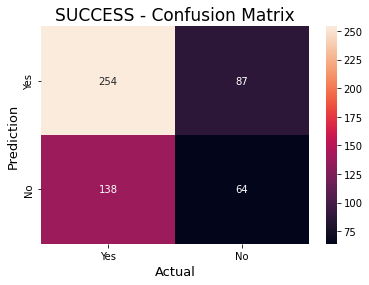

In [1424]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(conf_mat,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SUCCESS - Confusion Matrix',fontsize=17)
plt.show()

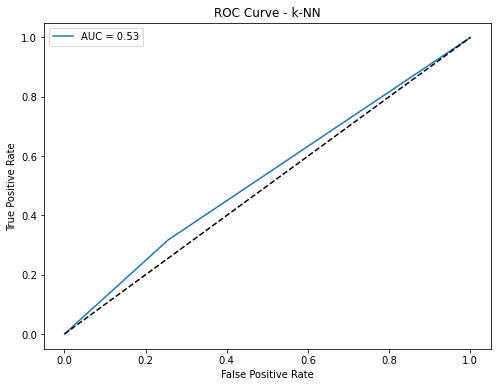

In [1425]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - k-NN')
plt.legend()
plt.show()

### Naive Bayes

In [1426]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier object
gnb = GaussianNB()

# Train the model using the training data
gnb.fit(X_train_prepared, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test_prepared)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.4953959484346225


In [1427]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.27      0.40       341
           1       0.42      0.88      0.57       202

    accuracy                           0.50       543
   macro avg       0.60      0.57      0.48       543
weighted avg       0.65      0.50      0.46       543



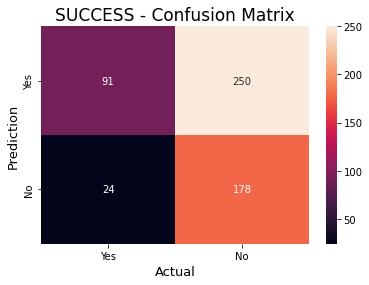

In [1428]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(conf_mat,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SUCCESS - Confusion Matrix',fontsize=17)
plt.show()

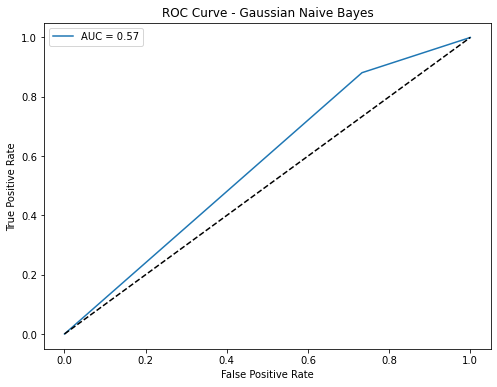

In [1429]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gaussian Naive Bayes')
plt.legend()
plt.show()

### Decision Trees

In [1430]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier object
dt_classifier = DecisionTreeClassifier()

# Train the model using the training data
dt_classifier.fit(X_train_prepared, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test_prepared)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.5064456721915286


In [1431]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       341
           1       0.33      0.33      0.33       202

    accuracy                           0.51       543
   macro avg       0.47      0.47      0.47       543
weighted avg       0.50      0.51      0.51       543



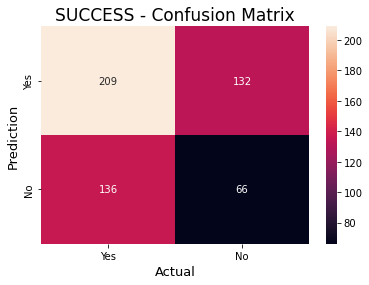

In [1432]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(conf_mat,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SUCCESS - Confusion Matrix',fontsize=17)
plt.show()

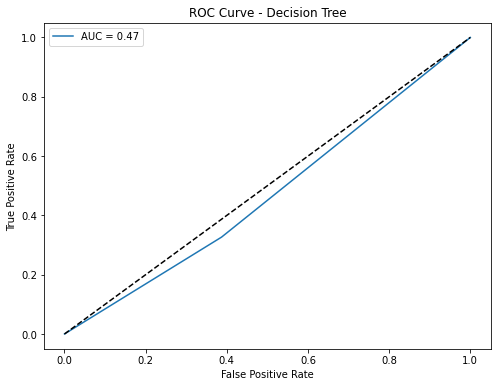

In [1433]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

## SVM

In [1434]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create an SVM classifier object
svm_classifier = SVC()

# Train the model using the training data
svm_classifier.fit(X_train_prepared, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_prepared)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.6427255985267035


In [1435]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       341
           1       0.54      0.30      0.39       202

    accuracy                           0.64       543
   macro avg       0.60      0.57      0.57       543
weighted avg       0.62      0.64      0.61       543



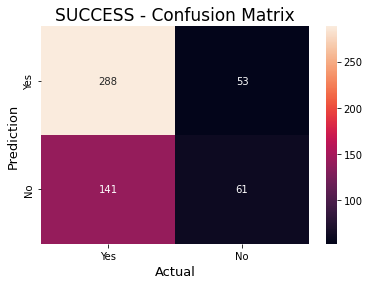

In [1436]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

#Plot the confusion matrix.
sns.heatmap(conf_mat,
            annot=True,
            fmt='g',
            xticklabels=['Yes','No'],
            yticklabels=['Yes','No'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SUCCESS - Confusion Matrix',fontsize=17)
plt.show()

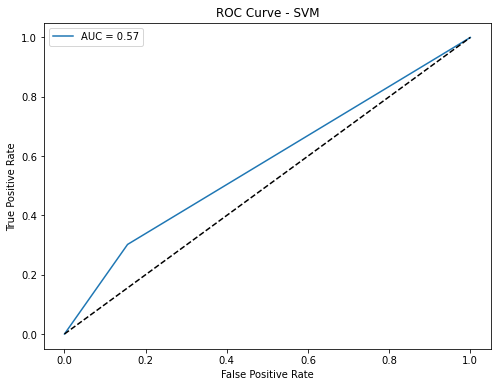

In [1437]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()